In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to C:\Users\Aarav
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('./IMDB Dataset.csv')

data['sentiment'].value_counts()

data.drop_duplicates(inplace=True)


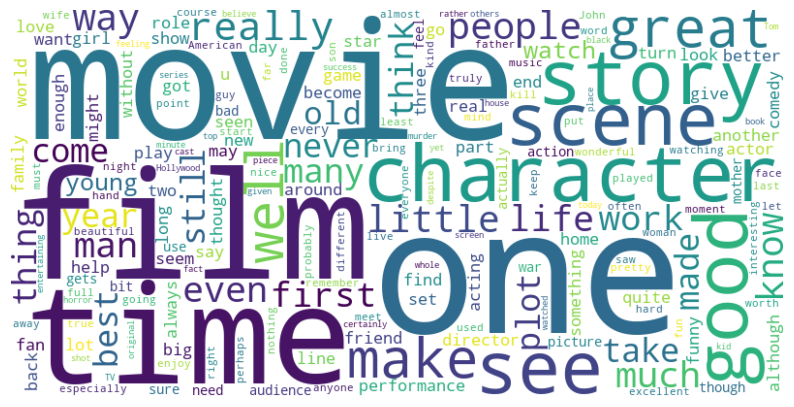

In [5]:
def clean_review(review):
    ignore_words = set(stopwords.words('english')) | {'movie', 'film'}
    cleaned = " ".join(word for word in review.split() if word.lower() not in ignore_words)
    return cleaned

data['review'] = data['review'].apply(clean_review)

review = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


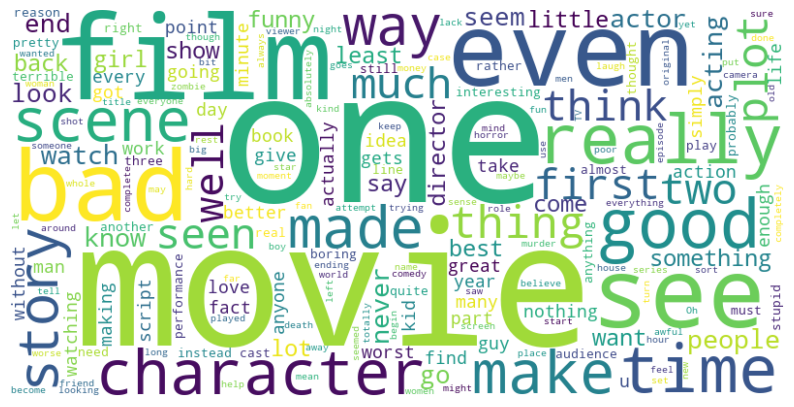

In [6]:
data['review'] = data['review'].apply(clean_review)

review = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

CV = TfidfVectorizer(max_features = 2500)

reviews = CV.fit_transform(data['review']).toarray()

data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

print(data['sentiment'].value_counts())

sentiment
0    263
1    237
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(reviews, data['sentiment'], test_size=0.2, random_state=42)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
predict = model.predict(X_test)

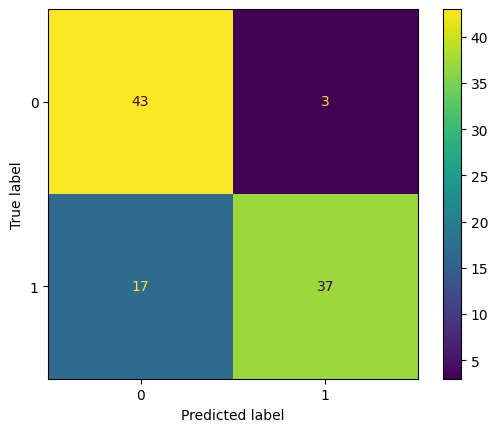

In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [11]:
import joblib

# Save the trained logistic regression model
joblib.dump(model, "sentiment_model.joblib")

# Also save the vectorizer (important for transforming new inputs)
joblib.dump(CV, "vectorizer.joblib")


['vectorizer.joblib']